# Wine dataset classified using a neural network 

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, cohen_kappa_score

## Load data

Loaded:  4898


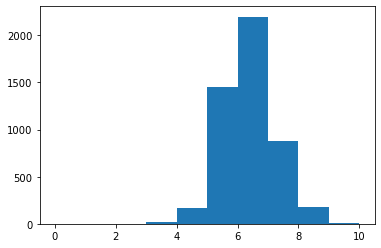

In [2]:
data = pd.read_csv('winequality-white.csv',sep=';')
print("Loaded: ",len(data))
samples = data.values[:,0:10]
labels = data.values[:,11]

plt.hist(labels,bins=10,range=(0,10))
plt.show()

## Create the model

In [3]:
model = Sequential()
model.add(Dense(50, input_dim=10, activation='sigmoid'))
model.add(Dense(50, activation='sigmoid'))
#model.add(Dense(1, activation='sigmoid'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer="adam",metrics=['mae'])
model.summary()
num_epochs=0

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                550       
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 3,151
Trainable params: 3,151
Non-trainable params: 0
_________________________________________________________________


### Divide to training and test

In [4]:
# train-test split
import sklearn.model_selection
(trainSamples, testSamples, trainLabels, testLabels) = sklearn.model_selection.train_test_split(samples, labels, stratify=labels, random_state=1)

### Train the model (may be run multiple times)

In [6]:
EPOCHS=200
print("training labels",trainLabels.shape)
print("Fitting...")
H = model.fit(trainSamples, trainLabels, epochs=EPOCHS, verbose=0)    
num_epochs += EPOCHS
print("Epoch",num_epochs)
print("Initial loss",H.history["loss"][0])
print("Final loss",H.history["loss"][-1])

training labels (3673,)
Fitting...
Epoch 400
Initial loss 0.6068840026855469
Final loss 0.5932947993278503


### Predict

In [7]:
predictedLabels = model.predict(testSamples)

## Regression errors

In [8]:
from sklearn.metrics import mean_squared_error, r2_score

print('MSE=',mean_squared_error(testLabels, predictedLabels))
print('R2=',r2_score(testLabels, predictedLabels))

MSE= 0.6079644455214013
R2= 0.2239150643864125


## Linear regression for comparison

In [9]:
from sklearn import linear_model

linModel = linear_model.LinearRegression()

linModel.fit(trainSamples, trainLabels)    
linModelResults = linModel.predict(testSamples)

print('MSE=',mean_squared_error(testLabels, linModelResults))
print('R2=',r2_score(testLabels, linModelResults))

MSE= 0.5389488176982694
R2= 0.31201559307688687
